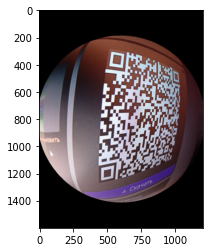

QR не распознан


In [18]:
# проверим - можно ли распознать QR
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread("QR.jpg")
plt.imshow(img)
plt.show()

detector = cv.wechat_qrcode_WeChatQRCode()
res, points = detector.detectAndDecode(img)
if len(res) > 0:
    print("QR прочитался")
else:
  print("QR не распознан")

**Исправления искажений камеры**

In [ ]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
# Проведем калибровку камеры, для этого сделаем фотографии шахматной доски и
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((7*7,3), np.float32) # 7*7 - внутрение углы клеток обычной шахматной доски
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
objpoints = []
imgpoints = []
for fname in glob.glob('imagesChessboard/*.jpg'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (7,7), None)
    if ret == True:
        # углы нашлись
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
cv.destroyAllWindows()

/content/drive/MyDrive/maga/8h9JyblwhlA.jpg


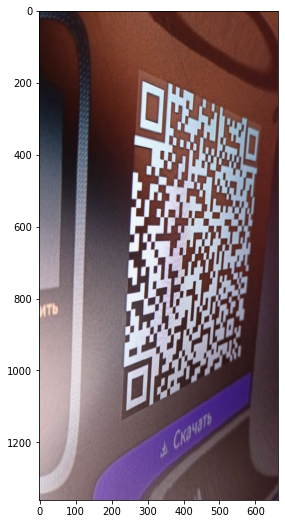

True

In [21]:
# калибровка
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# исправим изображение
img=cv.imread("QR.jpg")
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
print(fname)
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(12,9))
plt.imshow(dst)
plt.show()
cv.imwrite('newQR.jpg', dst)

In [22]:
# проверим - можно ли распознать QR
res, points = detector.detectAndDecode(dst)
if len(res) > 0:
    print("QR прочитался")
else:
  print("QR не распознан")

QR не распознан


**Преобразование четырехугольного QR к квадратному**

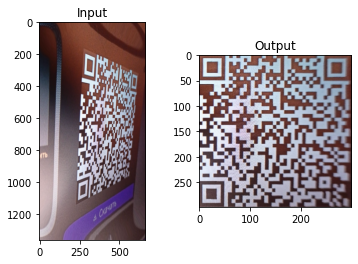

True

In [23]:
img = dst
rows,cols,ch = img.shape
# укажем угловые точки QR
pts1 = np.float32([[275,163],[619,321],[230,1142],[563,961]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

cv.imwrite('trueQR.jpg', dst)

In [24]:
res, points = detector.detectAndDecode(dst)
if len(res) > 0:
    print("QR прочитался")
else:
  print("QR не распознан")

QR прочитался
